# MODELO CLASIFICACION KNN  k-NEAREST-NEIGHBOURS

### CAMBIAR RUTA CARPETA LOCAL Y EJECUTAR

In [7]:
# CAMBIAR SEGUN RUTA LOCAL HASTA UBICACION DEL REPOSITORIO
ruta = '/Users/manue/TFM'

Presentamos e Importamos todas las librerias que vamos a necesitar a lo largo del modelo.

In [3]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 


Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y el nombre de las Columnas / variables que la componen. Las variables que se refierne a unidades de negocio no las vamos a utilizar en el modelo por lo que las transformamos a Objeto para un mejor entendimiento y segmentacion de las propias variables. 

In [4]:
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [5]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [6]:
df.shape

(451374, 30)

In [14]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## PRIMERA APROXIMACION AL MODELO

In [15]:
df = df.select_dtypes('number')

In [16]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 8576106 (451374, 19)
Datos y = 451374 (451374,)


In [17]:
# Instanciamos el clasificador
clfknn = KNeighborsClassifier(n_neighbors=5)

In [18]:
# Entrenamos el modelo
clfknn.fit(X,y)

KNeighborsClassifier()

In [19]:
# Sacamos las primeras predicciones
clfknn.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
# Dividimos nuestro DF en Set de Entrenamiento 80% y Set de Test 20%.  
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [21]:
# Entrenamos el modelo
clfknn.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
# Sacamos las primeras predicciones
clfknn.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
# Sacamos probabilidades de la opcion 1 "Tiene Seguro de Hogar"
clfknn.predict_proba(X_test)[:, 1]

array([0. , 0. , 0.6, ..., 0. , 0. , 0.2])

Los resultados obtenidos en Train estan algo separados a los obtenidos en test. Significa que nuestro modelo puede no estar generalizando bien. Esto puede ser sintoma de overfitting. Debemos seguir mejorandolo para conseguir mejores metricas. 

In [24]:
# Primeros restultados con metrica elegida "Recall" para ver si generaliza bien nuestro modelo.
recall_train_modelo_primera_aproximacion = recall_score(y_train,clfknn.predict(X_train))
recall_test_modelo_primera_aproximacion = recall_score(y_test,clfknn.predict(X_test))
print('recall_train_modelo_primera_aproximacion', recall_train_modelo_primera_aproximacion)
print('recall_test_modelo_primera_aproximacion =', recall_test_modelo_primera_aproximacion)

recall_train_modelo_primera_aproximacion 0.23878280100370008
recall_test_modelo_primera_aproximacion = 0.11531607976240985


In [25]:
# Resultados obtenidos del modelo.
print('== Primera Aproximacion KNN_model ==')
print ('accuracy_score =', accuracy_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('precision  =', precision_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfknn.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, clfknn.predict(X_test)))

== Primera Aproximacion KNN_model ==
accuracy_score = 0.8530490168928274
precision  = 0.323648487735175
recall = 0.11531607976240985
f1_score = 0.17004504504504506
roc_auc_score = 0.6515131167178456
classification_report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     78490
           1       0.32      0.12      0.17     11785

    accuracy                           0.85     90275
   macro avg       0.60      0.54      0.54     90275
weighted avg       0.81      0.85      0.82     90275



Sin entrenar: ROC AUC=0.500
KNN: ROC AUC=0.652


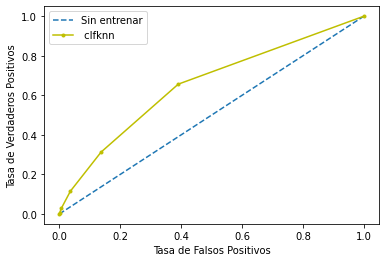

In [26]:
# Pintamos Curva Roc
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clfknn.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfknn.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfknn' , color = "y")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/KNN Model - Roc Curve primera aprox.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## MODELO

In [45]:
# Leemos la base de datos
df_normalized = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalized.csv')

In [46]:
# Inputs y Target 
X = df_normalized.drop(['lp_seg_hogar'], axis = 1)
y= df_normalized['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6684992 (417812, 16)
Datos y = 417812 (417812,)


In [47]:
# Ajustamos nuestro set de entrenamiento y test Con pca. (80-20)
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [48]:
# Entrenamos nuestro modelo
clfknn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
# Hacemos las primeras predicciones
clfknn.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
# Sacamos probabilidades de la opcion 1 "Tiene Seguro de Hogar"
clfknn.predict_proba(X_test)[:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
# Primeros resultados.  Sigue sin generalizar bien.
recall_train_evolucion_modelo = recall_score(y_train,clfknn.predict(X_train))
recall_test_evolucion_modelo = recall_score(y_test,clfknn.predict(X_test))
print('recall_train_evolucion_modelo', recall_train_evolucion_modelo)
print('recall_test_evolucion_modelo =', recall_test_evolucion_modelo)

recall_train_evolucion_modelo 0.449884314838259
recall_test_evolucion_modelo = 0.32872585504164453


## Técnicas de validación cruzada.  Métricas: Validación cruzada
Utilizamos la validación cruzada iterando 5 veces a lo largo del conjunto de entrenamiento.

- Apartamos 1/5 muestras.
- Entrenamos el modelo con las 4/5 muestras restantes.
- Mediremos con diferentes métricas el resultado obtenido en las muestras apartadas.
- Esto significa que hacemos 5 entrenamientos independientes.
- El resultado será la media de las 5 métricas anteriores.

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfknn,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfknn,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfknn,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.5268871635721725, 0.32168126094570926, 0.3994235414171186)

In [53]:
print('========= CLFKNN ===================')
print ('accuracy_score = ', accuracy_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfknn.predict_proba(X_test)[:, 1]))
print('====================================')


========= CLFKNN ===================
accuracy_score =  0.8705288225650109
precision = 0.533582626204516
recall = 0.32872585504164453
f1_score = 0.4068205493722244
roc_auc_score = 0.7880027148639571


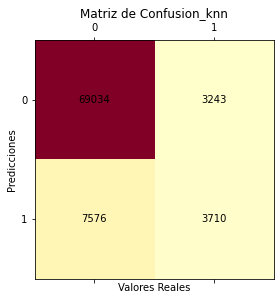

In [54]:
# Plot 
confusion_matrix_knn = confusion_matrix(y_test,clfknn.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(confusion_matrix_knn, cmap=plt.cm.YlOrRd)
for i in range(confusion_matrix_knn.shape[0]):
    for j in range(confusion_matrix_knn.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix_knn[i, j], va='center', ha='center')

plt.title('Matriz de Confusion_knn')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.tight_layout()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/KNN Model - Confusion_matrix_Knn.png', dpi=75,bbox_inches='tight')
plt.show()


## GridSearchCV  

Evaluamos y seleccionamos de forma sistemática los parámetros de un modelo. Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los segundos mediante validación cruzada.

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
# Buscamos los mejores parametros con GS
knn_grid_params_gs = {
    'n_neighbors' : [5,7,9,11],
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski','euclidean','manhattan']
    }

knngs = GridSearchCV(
        clfknn,
        knn_grid_params_gs,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )

In [57]:
# Entrenamos los parametros 
knngs.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 55.9min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [59]:
# Mejores estimadores
knngs.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [60]:
# mejores parametros
knngs.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

## Hacemos el modelo con los mejores parametros

In [61]:
# Instanciamos clasificador
clfknn = KNeighborsClassifier(metric ='manhattan', n_neighbors= 11, weights= 'uniform')

In [62]:
# Ajustamos nuestro set de entrenamiento y test Con pca. (80-20)
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [63]:
# Entrenamos el modelo
clfknn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [64]:
# Sacamos las predicciones
clfknn.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
# Sacamos probabilidades de la opcion 1 "Tiene Seguro de Hogar"
clfknn.predict_proba(X_test)[:, 1]

array([0.27272727, 0.09090909, 0.        , ..., 0.09090909, 0.09090909,
       0.        ])

In [66]:
# Resultados 
print('========= RESULTADO CLFKNN GRIDSEARCH ===================')
print ('accuracy_score = ', accuracy_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfknn.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfknn.predict_proba(X_test)[:, 1]))
print('====================================')

========= RESULTADO CLFKNN GRIDSEARCH ===================
accuracy_score =  0.8767516723908907
precision = 0.5930956423316356
recall = 0.278575225943647
f1_score = 0.3790920600470248
roc_auc_score = 0.8283547183036939


Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.828


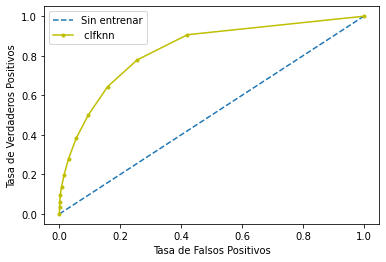

In [67]:
# Ploteamos Curva Roc
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clfknn.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfknn.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfknn' , color = "y")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/KNN Model - Roc Curve Knn grid.png', dpi=75,bbox_inches='tight')
pyplot.show()

## *** Conclusiones Modelo ***

- __Las principales metricas elegidas__ en el Modelo de clasificacion KN  para decidir si estamos ante un buen resultado es __Metrica Recall y AUC - Curva Roc.__ 
- Iniciamos nuestro modelo con una __primera aproximacion__ obteniendo unos resultados __muy mejorables. Recall 0,11.__ La base de datos utilizada es la original sin haber realizado ningun preprocesado. 
- __Confirmamos que nuestro set de entramiento ha generalizado bien__ al no haber mucha diferencia entre los resultados obtenidos de Test y Train. Quizas se puede intuir algo de overfiting por estar muy cerca las metricas de test y de train. 0.23 y 0.11 Recall.
- Evolucionamos nuestro modelo utilizando la base de datos preprocesada en la que hemos adaptado, aplicado Label Encoder, Standar Scaler y Normalizado variables. __Las metricas obtenidas son :  Recall 0.78 - Auc 0.32__
- Evalumos y seleccionamos de forma sistemática los parámetros de un modelo con __GridSearchCV__ Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los segundos mediante validación cruzada. __Las metricas finales obtenidas son Recall 0.27 - Auc 0.83.__ Hemos mejorado la curva ROC pero no es suficiente.
- Estudio de la matriz de confusion. Obtenemos unos resultados de Falsos negativos 8162  y verdaderos negativos 3214.  En nuestro modelo prima la deteccion de clientes que no van a contratar el seguro.  Detectando aquellos clientes que no son susceptibles de tener el seguro de hogar podemos trabajar con aquellos que si pueden tenerlo. Todo ello con un objetivo de optimizacion del tiempo y eficiencia comercial.
- Se echan en falta, entre otras muchas, variables y datos como la renta de los clientes, hijos, tipo de trabajo,   nomina real en euros obtenida, lugar de residencia...etc.